In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from PIL import Image
import glob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/64x64-faces/set_1/pic00139.jpg
/kaggle/input/64x64-faces/set_1/pic00156.jpg
/kaggle/input/64x64-faces/set_1/pic00142.jpg
/kaggle/input/64x64-faces/set_1/pic00116.jpg
/kaggle/input/64x64-faces/set_1/pic00106.jpg
/kaggle/input/64x64-faces/set_1/pic00085.jpg
/kaggle/input/64x64-faces/set_1/pic00029.jpg
/kaggle/input/64x64-faces/set_1/pic00035.jpg
/kaggle/input/64x64-faces/set_1/pic00042.jpg
/kaggle/input/64x64-faces/set_1/pic00157.jpg
/kaggle/input/64x64-faces/set_1/pic00073.jpg
/kaggle/input/64x64-faces/set_1/pic00040.jpg
/kaggle/input/64x64-faces/set_1/pic00008.jpg
/kaggle/input/64x64-faces/set_1/pic00020.jpg
/kaggle/input/64x64-faces/set_1/pic00093.jpg
/kaggle/input/64x64-faces/set_1/pic00079.jpg
/kaggle/input/64x64-faces/set_1/pic00016.jpg
/kaggle/input/64x64-faces/set_1/pic00101.jpg
/kaggle/input/64x64-faces/set_1/pic00058.jpg
/kaggle/input/64x64-faces/set_1/pic00092.jpg
/kaggle/input/64x64-faces/set_1/pic00037.jpg
/kaggle/input/64x64-faces/set_1/pic00002.jpg
/kaggle/in

In [2]:
image_pil = Image.open('/kaggle/input/64x64-faces/set_1/pic00118.jpg')
image_pil = image_pil.convert('L')
image = np.array(image_pil)

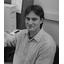

In [3]:
image_pil

In [4]:
col_image = np.array([image.T.ravel()]).T
col_image

array([[255],
       [251],
       [243],
       ...,
       [253],
       [252],
       [251]], dtype=uint8)

In [8]:
folder = glob.glob("/kaggle/input/64x64-faces/set_1/*.jpg")

image_list = []
for file in folder:
    image = Image.open(file).convert("L")
    image_vector = np.array(image)
    image_list.append(np.array([image_vector.T.ravel()]).T)   
    

In [15]:
images_matrix = np.column_stack(image_list)

mean_array = np.zeros_like(image_list[0])
for pic in image_list:
    mean_array += pic
    
mean_array = mean_array/columns
mean_array_list = [mean_array for i in range(columns)]

mean_matrix = np.column_stack(mean_array_list)

In [16]:
mean_matrix

array([[0.68518519, 0.68518519, 0.68518519, ..., 0.68518519, 0.68518519,
        0.68518519],
       [0.00925926, 0.00925926, 0.00925926, ..., 0.00925926, 0.00925926,
        0.00925926],
       [2.36111111, 2.36111111, 2.36111111, ..., 2.36111111, 2.36111111,
        2.36111111],
       ...,
       [0.73148148, 0.73148148, 0.73148148, ..., 0.73148148, 0.73148148,
        0.73148148],
       [0.80555556, 0.80555556, 0.80555556, ..., 0.80555556, 0.80555556,
        0.80555556],
       [1.80555556, 1.80555556, 1.80555556, ..., 1.80555556, 1.80555556,
        1.80555556]])

In [18]:
R = ((final_matrix - mean_matrix) @ (final_matrix - mean_matrix).T) / (columns-1)

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(R)
sorted_eigenvalues = eigenvalues.argsort()
eigenvectors.shape

(4096, 4096)

In [20]:
p = 100

vectorList = []

for i in range(p):
    vector = eigenvectors[:, sorted_eigenvalues[i]]
    vectorList.append(vector)

In [21]:
V = np.column_stack(vectorList)
sub_matrix = final_matrix - mean_matrix

In [24]:
weight_list = []
for i in range(sub_matrix.shape[1]):
    weight = V.T @ sub_matrix[:,i]
    weight_list.append(weight)

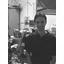

In [22]:
image = Image.open('/kaggle/input/64x64-faces/set_1/pic00064.jpg')
image = image.convert('L')
image_vector = np.array(image)
image_vector = np.array([image_vector.T.ravel()]).T
image

In [25]:
new_weight = V.T @ image_vector
distance_list = []

for weight in weight_list:
    distance = np.linalg.norm(new_weight - weight)
    distance_list.append(distance)

In [26]:
distance_vector = np.array(distance_list)
top = distance_vector.argsort()[:10]

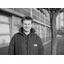

In [31]:
display_list = []
for t in top:
    image = Image.open(folder[t])
    image = image.convert('L')
    display_list.append(image)

display_list[0]